# STOCK MARKET ANALYSIS

##### Market prediction offers great profit avenues and is a fundamental stimulus for most researchers in this area. To predict the market, most researchers use either technical or fundamental analysis. Technical analysis focuses on analyzing the direction of prices to predict future prices, while fundamental analysis depends on analyzing unstructured textual information like financial news and earning reports. More and more valuable market information has now become publicly available online. This draws a picture of the significance of text mining strategies to extract significant information to analyze market behavior. While many papers reviewed the prediction techniques based on technical analysis methods, the papers that concentrate on the use of text mining methods were scarce. In contrast to the other current review articles that concentrate on discussing many methods used for forecasting the stock market, this study aims to compare many machine learning (ML) and deep learning (DL) methods used for sentiment analysis to find which method could be more effective in prediction and for which types and amount of data. The study also clarifies the recent research findings and its potential future directions by giving a detailed analysis of the textual data processing and future research opportunity for each reviewed study.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlpb
%matplotlib inline
import seaborn as sns
sns.set()
import csv
import math
import warnings
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
     


In [2]:

data=pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
data.reset_index()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...,...
2030,2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [3]:

data.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [4]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [5]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [6]:

data.tail(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2025,2010-08-03,118.3,119.95,117.90,118.65,118.30,611234,726.78
2026,2010-08-02,117.3,118.50,116.60,118.10,117.30,663593,779.85
2027,2010-07-30,116.5,118.00,114.60,115.85,116.05,2656191,3112.68
2028,2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134,2791.03
2029,2010-07-28,118.0,120.50,117.20,118.15,118.25,835593,994.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [7]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [8]:
print('The dataset has {} rows and {} columns'.format(data.shape[0],data.shape[1]))
print('\n')

The dataset has 2035 rows and 8 columns




In [10]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [11]:

data.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_10300\4099628898.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


C:\Users\User\AppData\Local\Temp\ipykernel_10300\3924389293.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap="crest")


<Axes: >

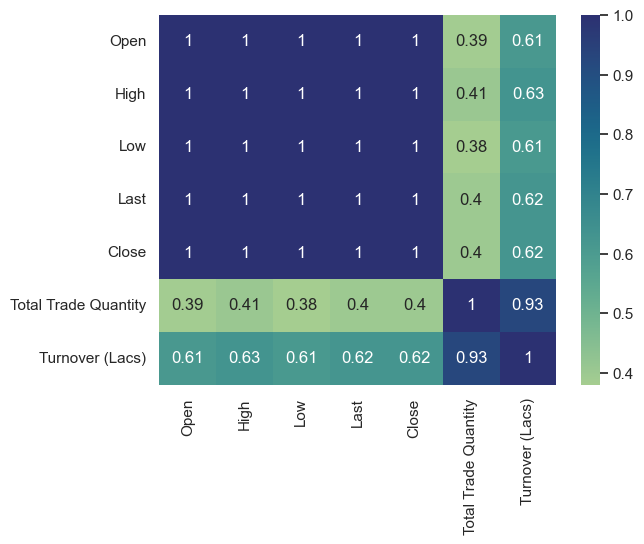

In [12]:

sns.heatmap(data.corr(),annot=True,cmap="crest")

<Axes: >

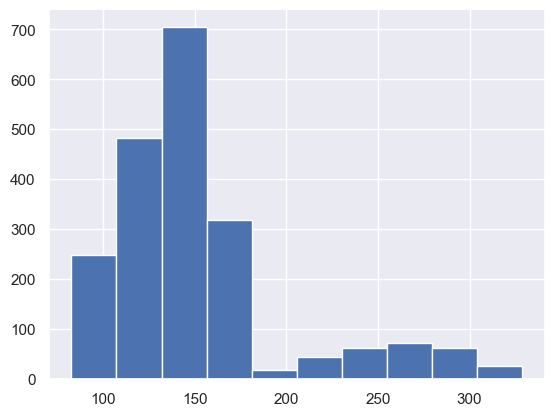

In [13]:

data['High'].hist()

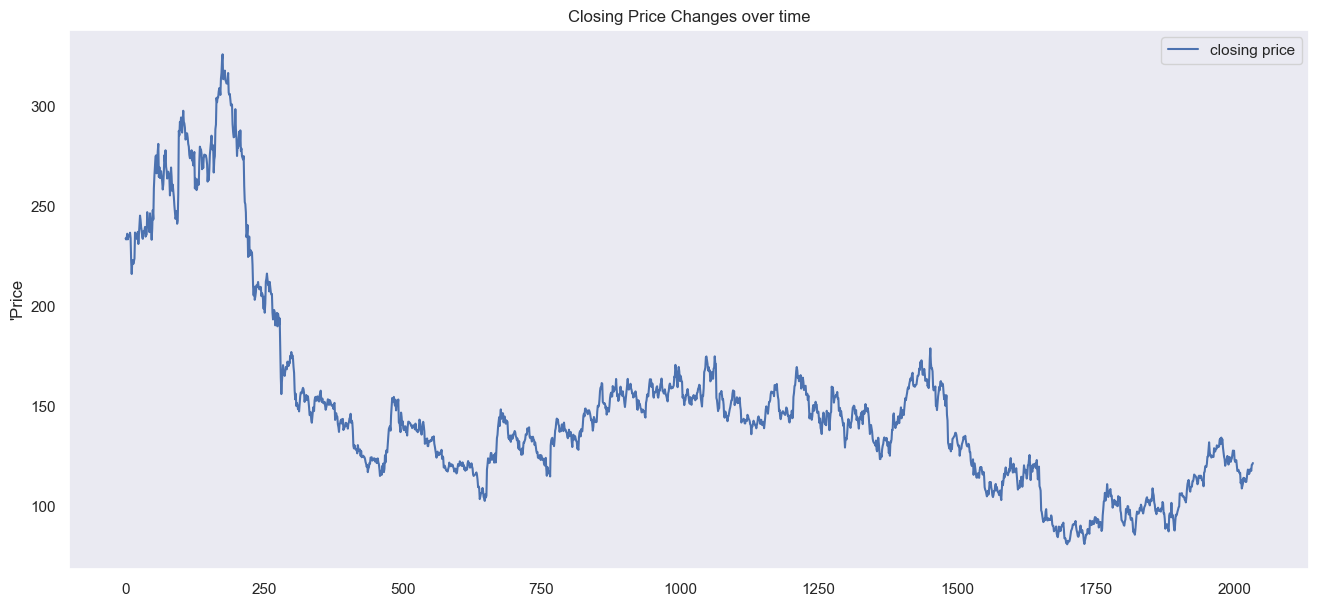

In [14]:

mlpb.figure(figsize=(10,6))
data['Close'].plot(kind='line',figsize=(16,7),c='b',label='closing price')

mlpb.ylabel("'Price")
mlpb.legend(loc="upper right")
mlpb.title("Closing Price Changes over time")
mlpb.grid()

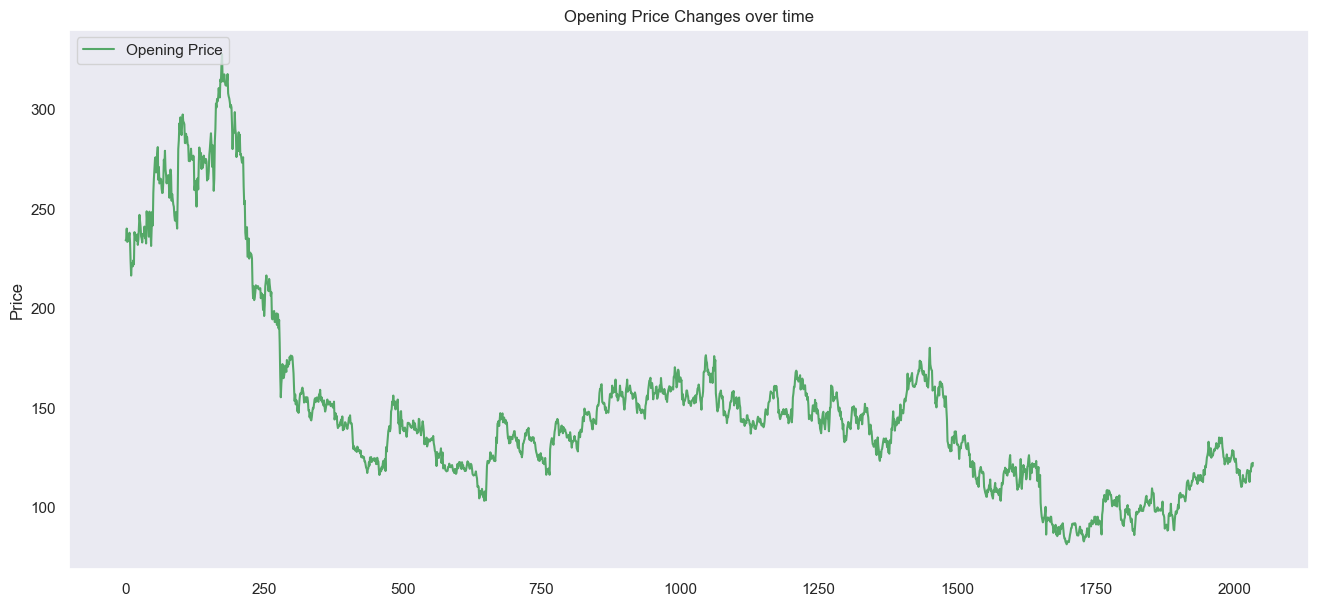

In [15]:

mlpb.figure(figsize=(10,6))
data["Open"].plot(kind='line',figsize=(16,7),c='g',label="Opening Price")

mlpb.ylabel("Price")
mlpb.legend(loc="upper left")
mlpb.title("Opening Price Changes over time")
mlpb.grid()

In [16]:
df_close=data.reset_index()['Close']
df_close

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

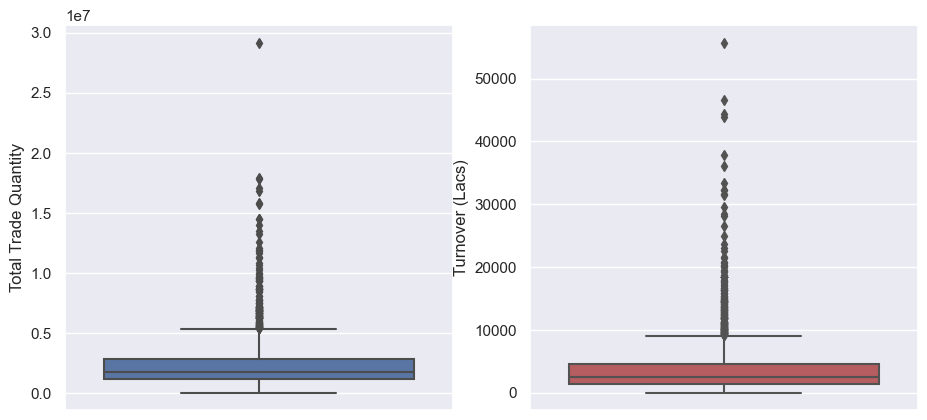

In [17]:
mlpb.figure(figsize=(11,5))
mlpb.subplot(1,2,1)
sns.boxplot(data=data,y='Total Trade Quantity',color='b')
sns.set_style("darkgrid")
mlpb.subplot(1,2,2)
sns.boxplot(data=data,y='Turnover (Lacs)',color='r')
sns.set_style("darkgrid")

In [18]:
training_set=data.reset_index()['Open']
training_set

0       234.05
1       234.55
2       240.00
3       233.30
4       233.55
         ...  
2030    117.60
2031    120.10
2032    121.80
2033    120.30
2034    122.10
Name: Open, Length: 2035, dtype: float64

In [19]:
scaler=MinMaxScaler(feature_range=(0,1))
training_set=scaler.fit_transform(np.array(df_close).reshape(-1,1))
training_set

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [20]:
train_size=int(len(training_set)*0.75)
test_size=int(len(training_set))-train_size
train_data,test_data=training_set[0:train_size,:],training_set[train_size:len(data),:1]
train_size
     

1526

In [21]:
def create_dataset(dataset,time_step=1):
  datax=[]
  datay=[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    datax.append(a)
    datay.append(dataset[i+time_step,0])
  return np.array(datax),np.array(datay)
     

In [22]:

time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [23]:

print(x_test.shape), print(y_test.shape)

(408, 100)
(408,)


(None, None)

In [24]:

print(x_train.shape,y_train.shape)

(1425, 100) (1425,)


In [25]:

print(x_test.shape,y_test.shape)

(408, 100) (408,)


In [26]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
print(x_train.shape)
print(y_train.shape)

(1425, 100, 1)
(1425,)


In [27]:
print(x_test.shape)
print(y_test.shape)

(408, 100, 1)
(408,)


In [28]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam",metrics="acc")
     


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [30]:

model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 18s 362ms/step - loss: 0.0243 - acc: 7.0175e-04 - val_loss: 0.0032 - val_acc: 0.0025
Epoch 2/100
23/23 [==============================] - 6s 263ms/step - loss: 0.0028 - acc: 7.0175e-04 - val_loss: 0.0014 - val_acc: 0.0025
Epoch 3/100
23/23 [==============================] - 8s 338ms/step - loss: 0.0011 - acc: 7.0175e-04 - val_loss: 9.4877e-04 - val_acc: 0.0025
Epoch 4/100
23/23 [==============================] - 7s 300ms/step - loss: 9.6308e-04 - acc: 7.0175e-04 - val_loss: 0.0012 - val_acc: 0.0025
Epoch 5/100
23/23 [==============================] - 5s 225ms/step - loss: 9.2113e-04 - acc: 7.0175e-04 - val_loss: 8.4536e-04 - val_acc: 0.0025
Epoch 6/100
23/23 [==============================] - 5s 221ms/step - loss: 9.1457e-04 - acc: 7.0175e-04 - val_loss: 9.8036e-04 - val_acc: 0.0025
Epoch 7/100
23/23 [==============================] - 5s 218ms/step - loss: 8.7035e-04 - acc: 7.0175e-04 - val_loss: 8.8624e-04 - val_acc: 0.0025
Epoch 8/

In [31]:

train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

13/13 [==============================] - 1s 38ms/step


In [32]:

train_predict=scaler.inverse_transform(train_data)
test_predict=scaler.inverse_transform(test_predict)
     

In [33]:
math.sqrt(mean_squared_error(y_test,test_predict))


106.1073205309601

In [34]:
look_back=100
trainPredictPlot=np.empty_like(training_set)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
#testPredictPlot=np.empty_like(training_set)
#testPredictPlot[:,:]=np.nan
#estPredictPlot[len(train_predict)+(look_back*2)+1:len(df_close)-1:]=test_predict
     


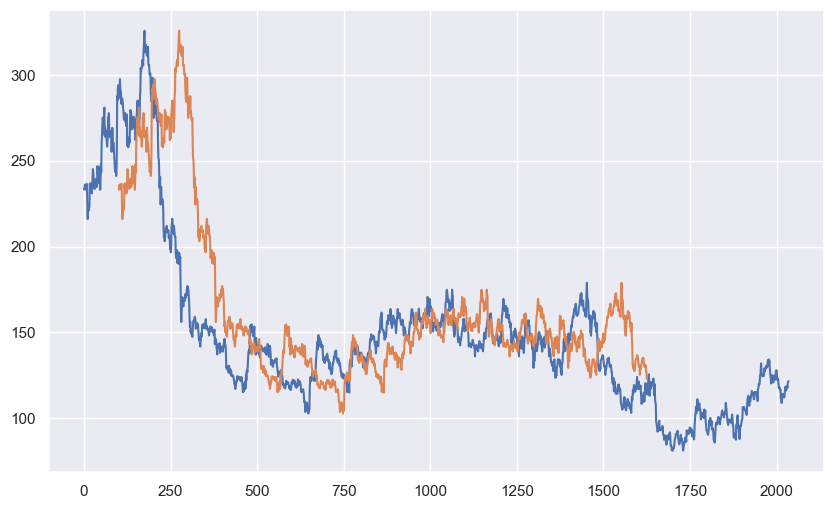

In [35]:

mlpb.figure(figsize=(10,6))
mlpb.plot(scaler.inverse_transform(training_set))
mlpb.plot(trainPredictPlot)
#mlpb.plot(testPredictPlot)
mlpb.show()